In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq


import warnings
warnings.filterwarnings('ignore')

In [120]:
df = pd.read_csv("full_data_cleaned.csv")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113216 entries, 0 to 113215
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113216 non-null  object 
 1   customer_id                    113216 non-null  object 
 2   order_status                   113216 non-null  object 
 3   order_purchase_timestamp       113216 non-null  object 
 4   order_approved_at              113216 non-null  object 
 5   order_delivered_carrier_date   113216 non-null  object 
 6   order_delivered_customer_date  113216 non-null  object 
 7   order_estimated_delivery_date  113216 non-null  object 
 8   order_item_id                  113216 non-null  float64
 9   product_id                     113216 non-null  object 
 10  seller_id                      113216 non-null  object 
 11  shipping_limit_date            113216 non-null  object 
 12  price                         

#### Selecionando apenas as variáveis de interesse

In [122]:
data = df[['order_purchase_timestamp','order_approved_at','order_status','order_delivered_carrier_date','order_delivered_customer_date',
        'order_estimated_delivery_date','order_item_id','product_id','order_id','price','freight_value','shipping_limit_date',
        'customer_zip_code_prefix','customer_city','customer_state','customer_zip_code_prefix',"seller_state","product_category_name"]]

#### EDA - Análise Exploratória de Dados  
> 
Agora que temos todos os dados em um conjunto, vamos para a etapa de análise exploratória para entender melhor o que está em nossas mãos.

* Podemos fazer algumas análises na variável de interesse "price", para começar a entender melhor os dados relacionados à tarefa proposta.

In [123]:
priceGrouped = data.groupby('order_id')['price'].sum()
priceGrouped.describe()

count    94490.000000
mean       143.625489
std        236.229765
min          0.850000
25%         47.650000
50%         89.180000
75%        154.900000
max      13440.000000
Name: price, dtype: float64

#### Vamos verificar a diferença de valor gerado por cada estado

<AxesSubplot:title={'center':'Preço Total por Estado'}, xlabel='customer_state', ylabel='price'>

<Figure size 432x288 with 0 Axes>

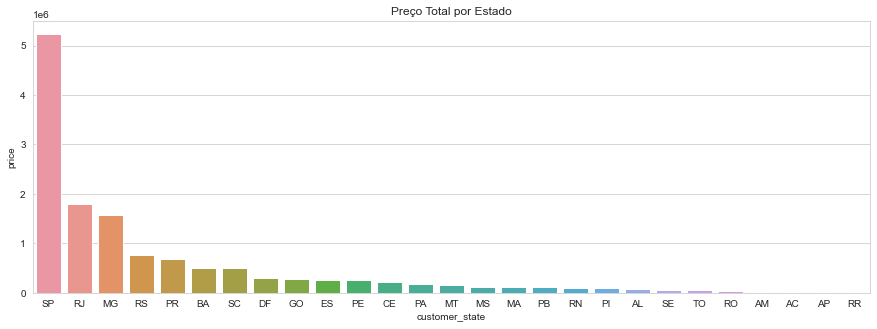

In [124]:
totalByState = data.groupby('customer_state')['price'].sum().sort_values(ascending=False)

sns.despine(offset=10, trim=True)
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Preço Total por Estado')
sns.barplot(x=totalByState.index, y=totalByState)

#### Pedidos seguem a mesma tendência em relação aos estados com maior atuação no consumo

<AxesSubplot:title={'center':'Ordem total de produtos por Estado'}, xlabel='customer_state', ylabel='order_id'>

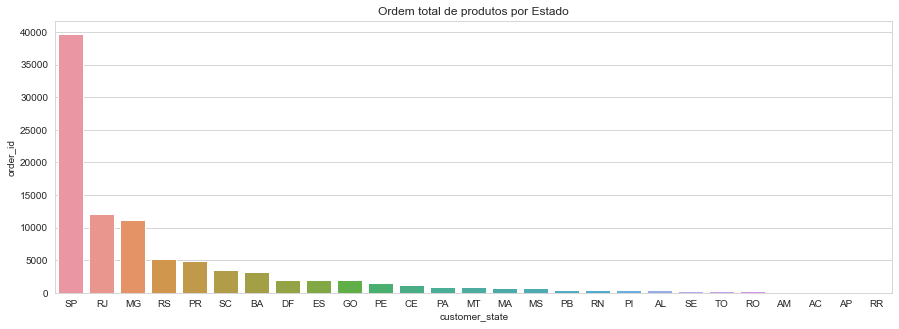

In [125]:
totalOrdersByState = data.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)
totalOrdersByState

plt.figure(figsize=(15,5))
plt.title('Ordem total de produtos por Estado')
sns.barplot(x=totalOrdersByState.index, y=totalOrdersByState)

##### Abaixo, também veremos quais estados recebem os vendedores com o maior número de vendas. Também é possível analisar quais estados possuem os maiores valores de frete, tendo em vista a grande extensão territorial do país.

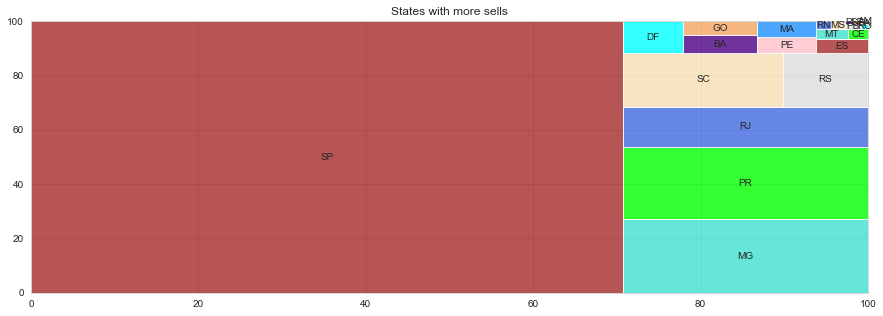

In [126]:
totalSellerByState = data.groupby('seller_state')['order_id'].nunique().sort_values(ascending=False)
totalSellerByState

# Define the plot sizes
fig, ax = plt.subplots(1, figsize = (15,5))
plt.title('States with more sells')

sq.plot(sizes= totalSellerByState,
        color = ['brown','turquoise','lime','royalblue','wheat','gainsboro','aqua','indigo','sandybrown','pink','dodgerblue'],
        label= totalSellerByState.index,
        alpha = .8)

plt.show()

<AxesSubplot:title={'center':'Valor médio do frete em R$ por Estado do Cliente'}, xlabel='customer_state'>

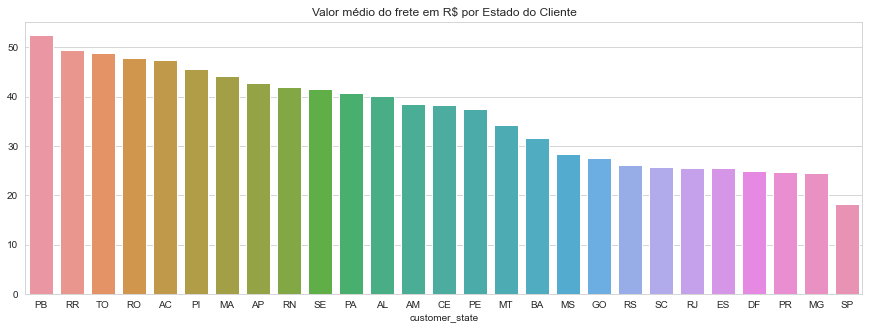

In [127]:
freightAvgState = (data.groupby('customer_state')['freight_value'].sum() /data.groupby('customer_state')['order_id'].nunique()).sort_values(ascending=False)


plt.figure(figsize=(15,5))
plt.title('Valor médio do frete em R$ por Estado do Cliente')
sns.barplot(x=freightAvgState.index, y=freightAvgState)

Categorias de produtos e avaliações. Aqui vamos verificar quais são os produtos com mais compras.

<AxesSubplot:title={'center':'As 10 principais categorias de produtos com mais pedidos'}, xlabel='product_category_name'>

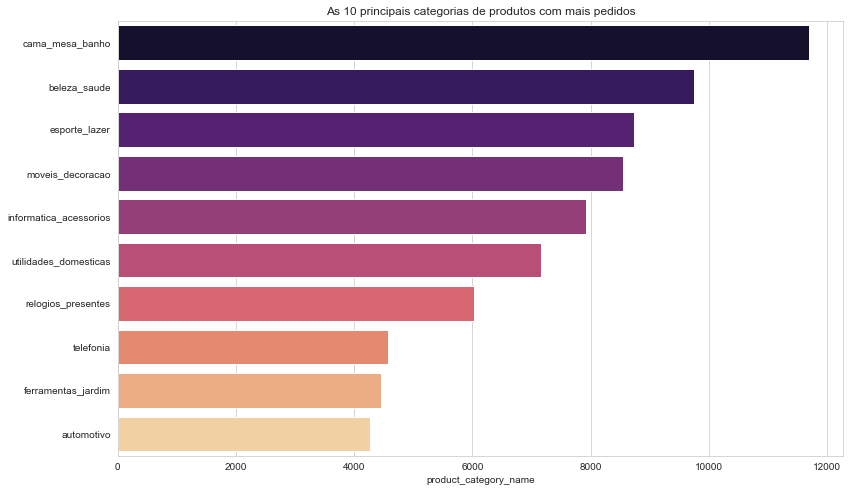

In [128]:
productCategoryOrders = data['product_category_name'].value_counts().head(10)

plt.figure(figsize=(13,8))
plt.title('As 10 principais categorias de produtos com mais pedidos')
sns.barplot(y=productCategoryOrders.index, x=productCategoryOrders, orient='h', palette="magma")

Apesar de fazermos algumas análises que nos mostram alguns insights, o que a tarefa nos pede é uma relação de valores por uma medida de tempo. Portanto, precisamos afunilar os dados que iremos usar pra alcançar o objetivo principal.

* Transformando nossos dados temporais em datetime, pois estavam como strings:

In [129]:
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])

print(data['order_approved_at'])

0        2017-10-02 11:07:15
1        2017-10-02 11:07:15
2        2017-10-02 11:07:15
3        2017-08-15 20:05:16
4        2017-08-02 18:43:15
                 ...        
113211   2018-08-10 21:25:22
113212   2018-07-05 16:17:52
113213   2018-07-24 11:24:27
113214   2018-05-22 21:35:40
113215   2018-05-16 03:35:29
Name: order_approved_at, Length: 113216, dtype: datetime64[ns]


Text(0.5, 0, 'Data')

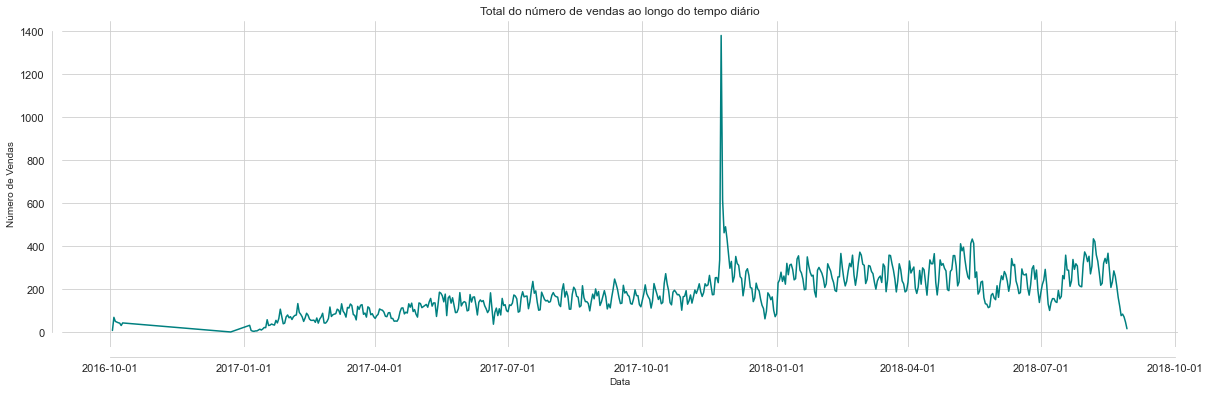

In [130]:
data.groupby([data['order_purchase_timestamp'].dt.date])['order_status'].count().plot(figsize=(20, 6), color="teal")

sns.despine(offset=10, trim=True)
sns.set_style("ticks")

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Total do número de vendas ao longo do tempo diário')
plt.ylabel('Número de Vendas')
plt.xlabel('Data')

In [131]:
all_dates = data['order_purchase_timestamp'].dt.date.sort_values().reset_index(drop=True)

miss_data = pd.date_range(start=all_dates.iloc[0], end=all_dates.iloc[-1]).difference(all_dates)
print(f'Total de dados faltantes: {len(miss_data)}')
print(miss_data)

Total de dados faltantes: 85
DatetimeIndex(['2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14',
               '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22',
               '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
               '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
               '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-12', '2016-11-13', '2016-11-14', '2016-11-15',
               '2016-11-16', '2016-11-17', '2016-11-18', '2016-11-19',
               '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23',
               '2016-11-24', '2016-11-25', '2016-11-26', '2016-11-27',
               '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
               '2016-12-02', '2016-12-03', '2016

In [132]:
print(f'Último dado faltante {miss_data[-1]}')
data= data[data['order_purchase_timestamp'] >= miss_data[-1]]

Último dado faltante 2017-01-04 00:00:00


Text(0.5, 0, 'Data')

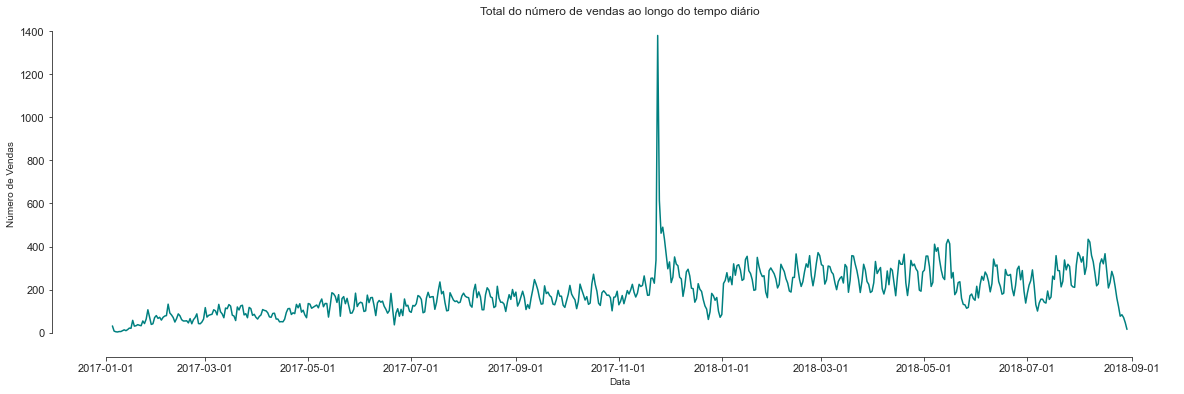

In [133]:
data.groupby([data['order_purchase_timestamp'].dt.date])['order_status'].count().plot(figsize=(20, 6), color="teal")

sns.despine(offset=10, trim=True)
sns.set_style("ticks")

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Total do número de vendas ao longo do tempo diário')
plt.ylabel('Número de Vendas')
plt.xlabel('Data')

In [134]:
time = data.groupby("order_purchase_timestamp")["price"].sum().reset_index()
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93727 entries, 0 to 93726
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  93727 non-null  datetime64[ns]
 1   price                     93727 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [135]:
time.set_index('order_purchase_timestamp', inplace=True, drop=True)
time.head()

,price
order_purchase_timestamp,
2017-01-05 11:56:06,10.9
2017-01-05 12:01:20,10.9
2017-01-05 12:06:36,2.9
2017-01-05 12:09:08,7.9
2017-01-05 12:11:23,9.9


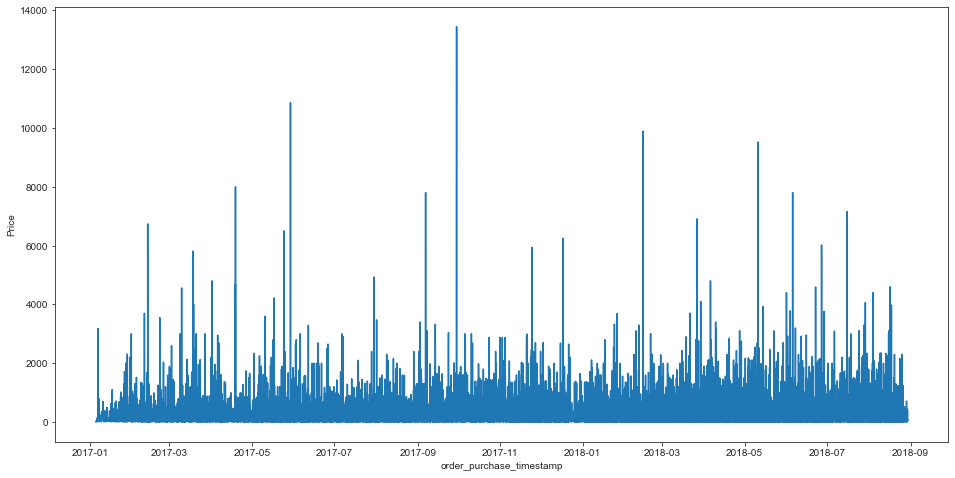

In [136]:
plt.figure(figsize=(16,8))
plt.xlabel("order_purchase_timestamp")
plt.ylabel("Price")
plt.plot(time)

#### 1) Criando o arquivo de montante $ por dias

In [137]:
days = time.groupby("order_purchase_timestamp")['price'].sum().reset_index()
print(days.tail(10).to_markdown())

days.to_csv('days.csv', index=False)

|       | order_purchase_timestamp   |   price |
|------:|:---------------------------|--------:|
| 93717 | 2018-08-29 08:46:11        |  457.75 |
| 93718 | 2018-08-29 09:14:11        |   99    |
| 93719 | 2018-08-29 09:48:09        |  169.8  |
| 93720 | 2018-08-29 10:22:35        |    6.9  |
| 93721 | 2018-08-29 11:06:11        |  109.9  |
| 93722 | 2018-08-29 12:25:59        |   63.9  |
| 93723 | 2018-08-29 14:18:23        |  418    |
| 93724 | 2018-08-29 14:18:28        |   45.9  |
| 93725 | 2018-08-29 14:52:00        |   24.9  |
| 93726 | 2018-08-29 15:00:37        |   84.99 |


#### 2) Criando o arquivo com montante em semanas

In [138]:
weeks = pd.DataFrame(time.resample('W')['price'].sum()) #resample using weeks as parameter

weeks.drop(weeks.tail(1).index, inplace=True) # Dropar a última semana que só tinha poucos dados, virando um outlier

weeks


,price
order_purchase_timestamp,
2017-01-08,5658.96
2017-01-15,11108.57
2017-01-22,23746.94
2017-01-29,55237.80
2017-02-05,65637.89
...,...
2018-07-29,235740.18
2018-08-05,278817.13
2018-08-12,277524.82


In [140]:
weeks.reset_index('order_purchase_timestamp', inplace=True) # tirando o índice

weeks.to_csv('weeks.csv', index=False) #salvando o arquivo
weeks

,order_purchase_timestamp,price
0,2017-01-08,5658.96
1,2017-01-15,11108.57
2,2017-01-22,23746.94
3,2017-01-29,55237.80
4,2017-02-05,65637.89
...,...,...
81,2018-07-29,235740.18
82,2018-08-05,278817.13
83,2018-08-12,277524.82
84,2018-08-19,250077.16
